<a href="https://colab.research.google.com/github/RabiAnjum09/codealpha_tasks/blob/main/CodeAlpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK#1**

**IRIS FLOWER CLASSIFICATION**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
iris = pd.read_csv('Iris.csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
iris.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [ ]:
print(iris.duplicated().sum())

0


In [ ]:
iris.drop(columns=['Id'], inplace=True)
X = iris.drop('Species', axis=1)
y = iris['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 1.0

📝 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45





*   A horizontal bar chart is being plotted to show the importance of features in a Random Forest mode.



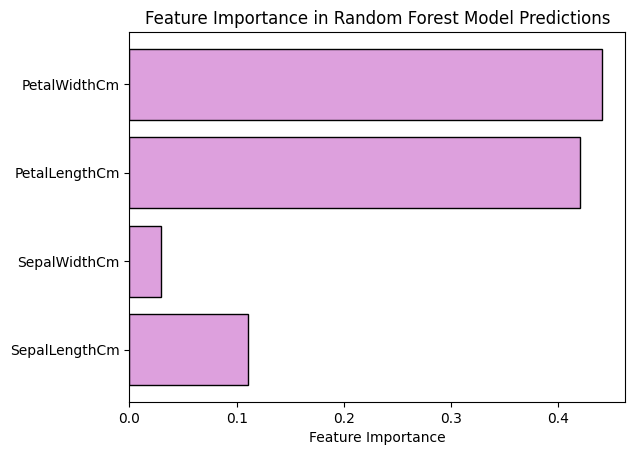

In [ ]:
feature_importance = model.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, feature_importance, color='plum', edgecolor='black')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model Predictions")
plt.show()



*   The below code generates stacked histograms for each feature in the `features` list represtenting the count of specie against each feature.




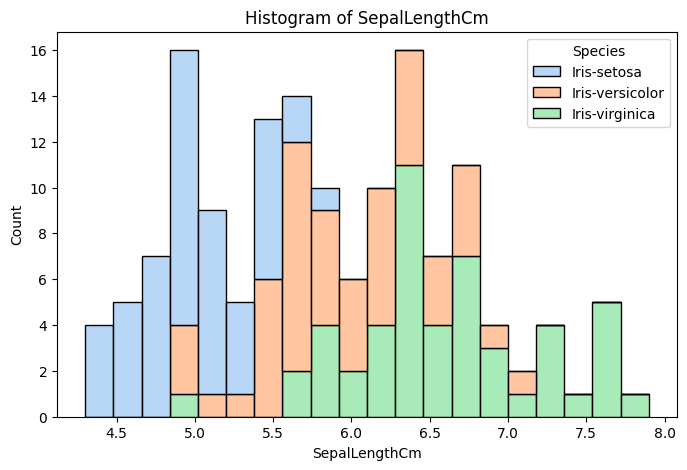

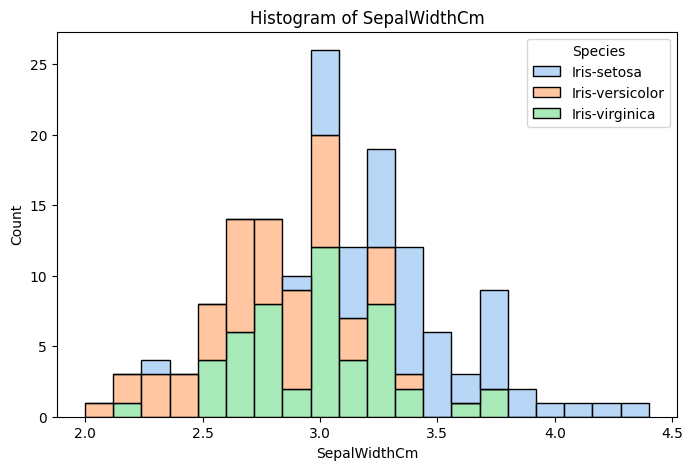

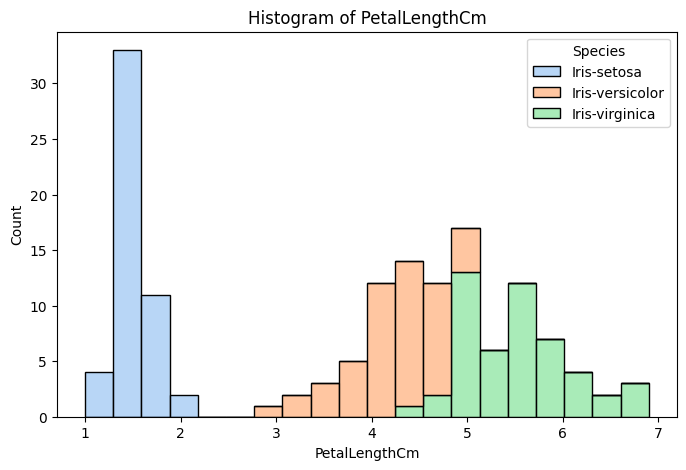

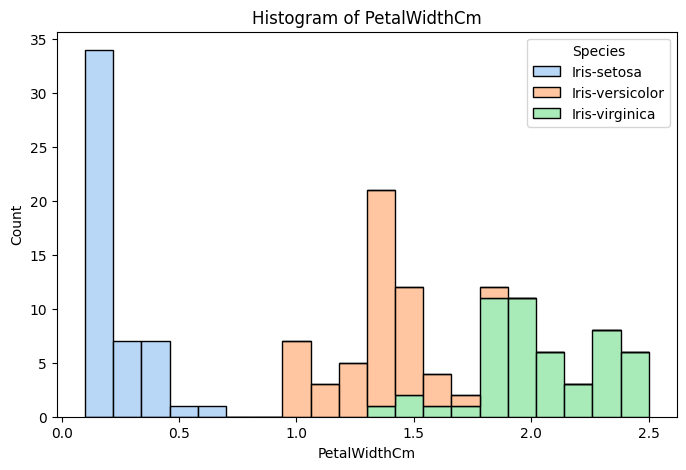

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=iris, x=feature, hue='Species', multiple='stack', palette='pastel', bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**x===========================================================================================================x**

**TASK#2**

**UNEMPLOYMENT ANALYSIS WITH PYTHON**

In [ ]:
employment = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [ ]:
print(employment.head(0))

Empty DataFrame
Columns: [Region,  Date,  Frequency,  Estimated Unemployment Rate (%),  Estimated Employed,  Estimated Labour Participation Rate (%), Region.1, longitude, latitude]
Index: []


In [ ]:
employment.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [ ]:
print(employment.duplicated().sum())

0


In [ ]:
employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
employment[' Date'] = pd.to_datetime(employment[' Date'])
print(employment[' Date'].dtype)

datetime64[ns]


/tmp/ipython-input-798468800.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  employment[' Date'] = pd.to_datetime(employment[' Date'])




*   This code plots a line chart showing how the estimated unemployment rate changes over time for different regions.



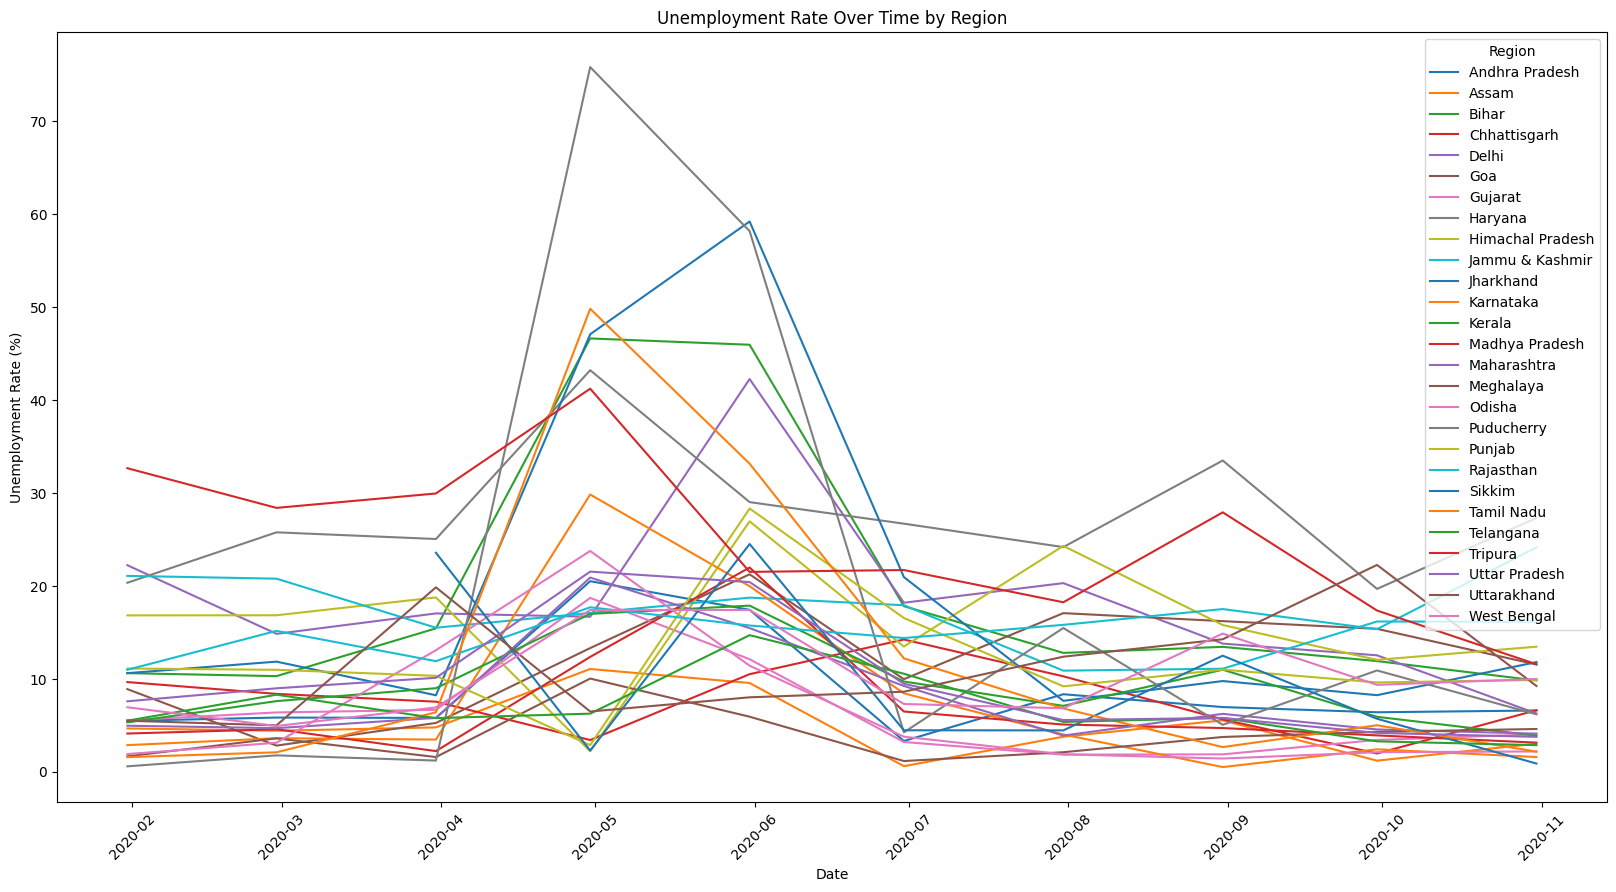

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=employment, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region', palette='tab10')
plt.title('Unemployment Rate Over Time by Region')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()



*   This code plots a line chart of unemployment rates over time by region and adds a black overall trend line based on the average unemployment rate across all regions using linear regression.
*  The trend line highlights the general direction of unemployment over time.


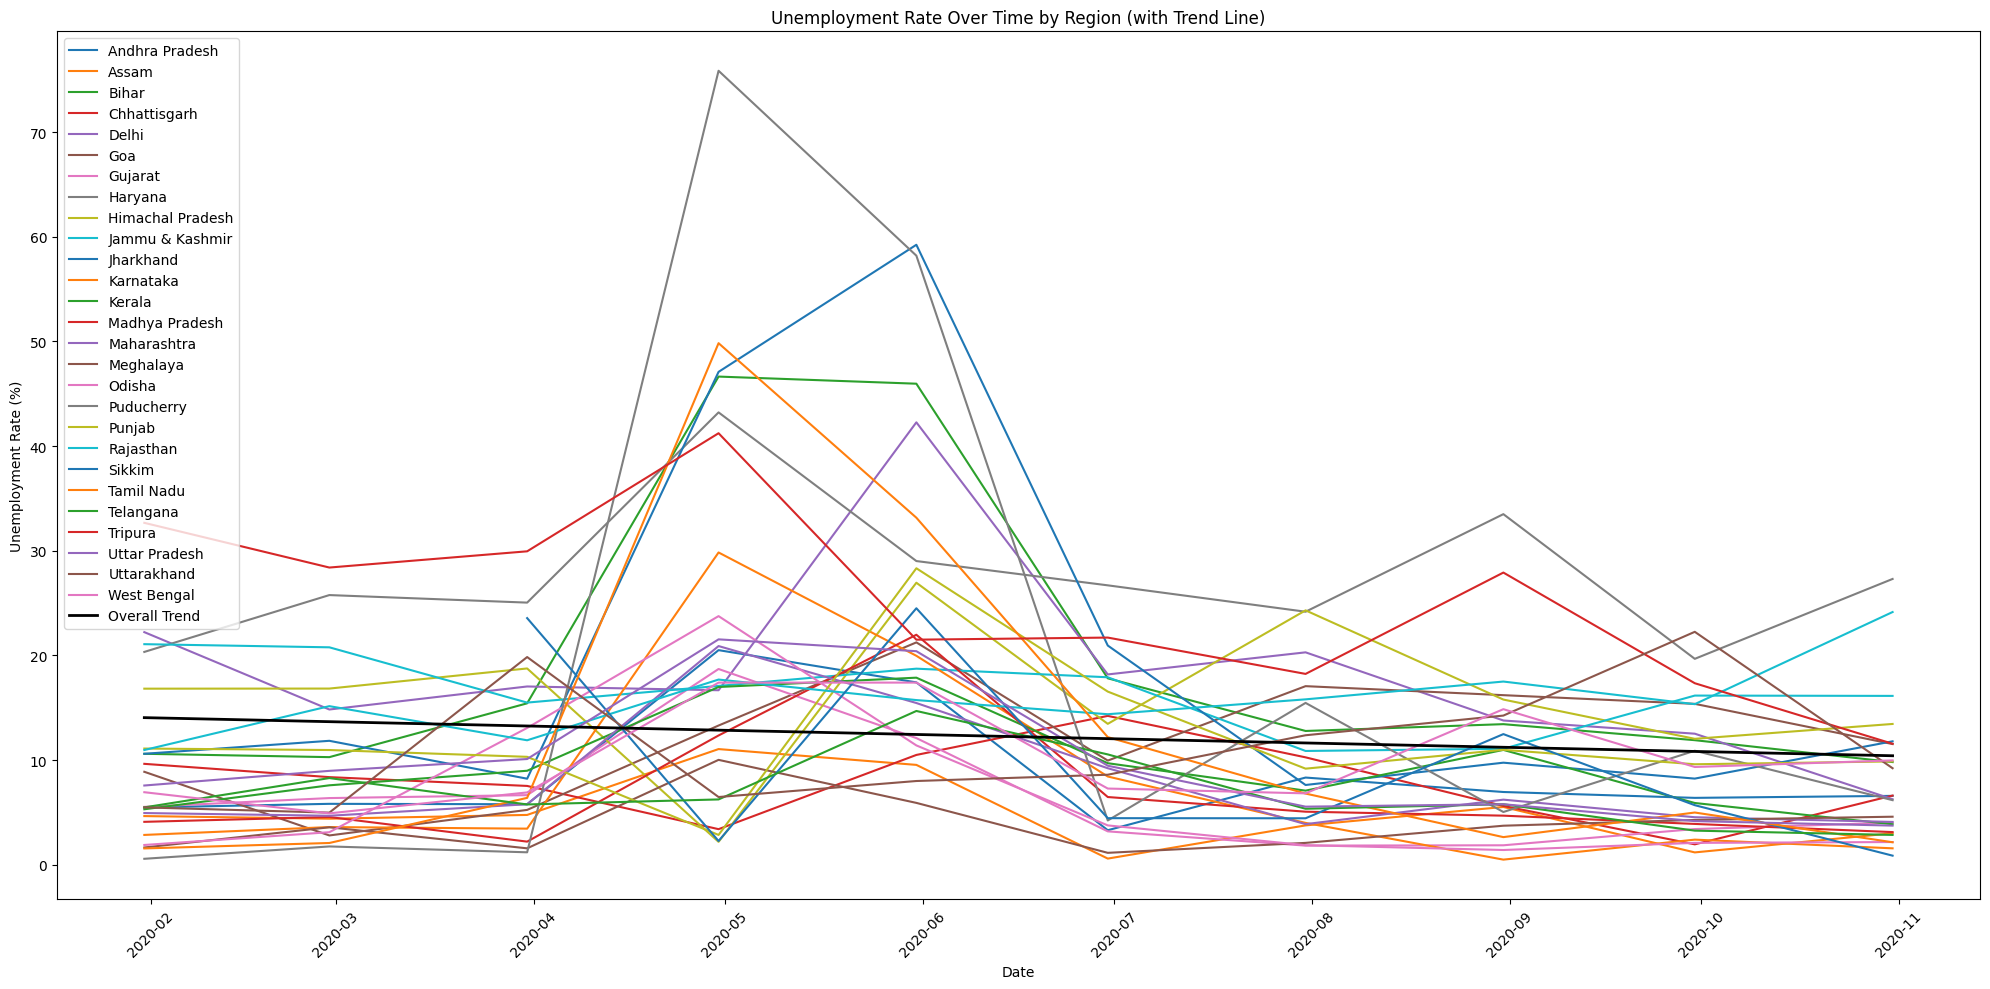

In [ ]:
avg_df = employment.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().reset_index()

avg_df['date_ordinal'] = avg_df[' Date'].map(pd.Timestamp.toordinal)

slope, intercept = np.polyfit(avg_df['date_ordinal'], avg_df[' Estimated Unemployment Rate (%)'], 1)
trend_line = slope * avg_df['date_ordinal'] + intercept

plt.figure(figsize=(20, 10))
sns.lineplot(data=employment, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region', palette='tab10')

plt.plot(avg_df[' Date'], trend_line, color='black', linewidth=2, label='Overall Trend')

plt.title('Unemployment Rate Over Time by Region (with Trend Line)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



*  This code filters the dataset for the period from March to July 2020 and creates a bar plot showing unemployment rates during that time to visualize the impact of COVID-19 on unemployment.




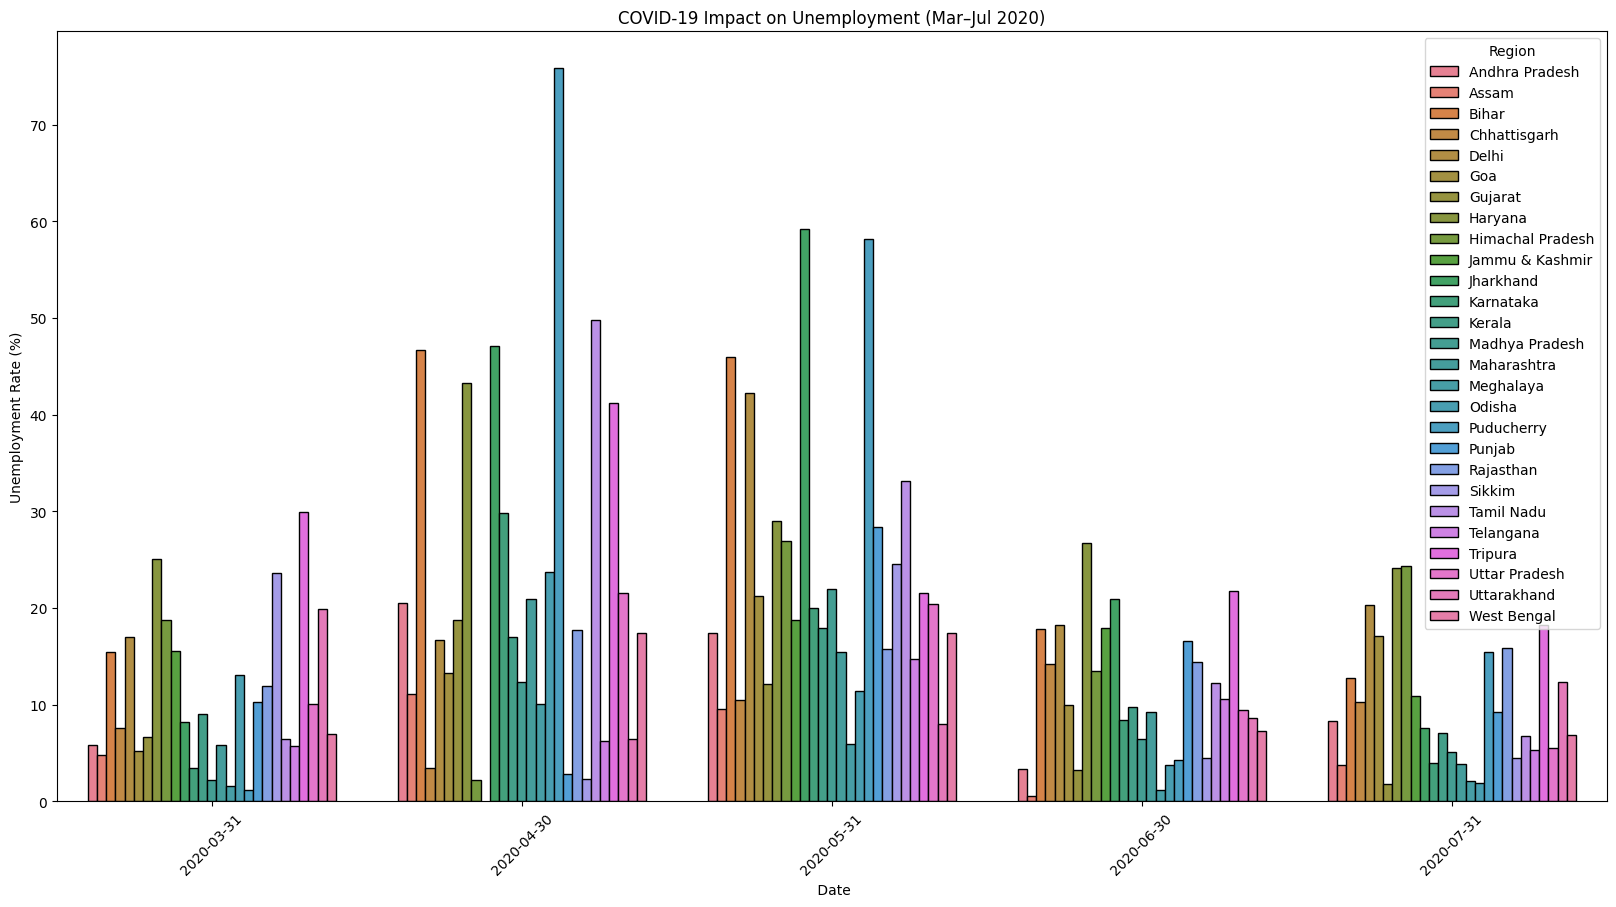

In [ ]:
covid_df = employment[(employment[' Date'] >= '2020-03-01') & (employment[' Date'] <= '2020-07-31')]

plt.figure(figsize=(20,10))
barplot = sns.barplot(data=covid_df, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region',edgecolor='black')
plt.title('COVID-19 Impact on Unemployment (Mar–Jul 2020)')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()



*   This code computes the monthly average unemployment rate for each region, reshapes the data into a matrix format, and visualizes it as a heatmap to show how unemployment rates vary across regions and months.



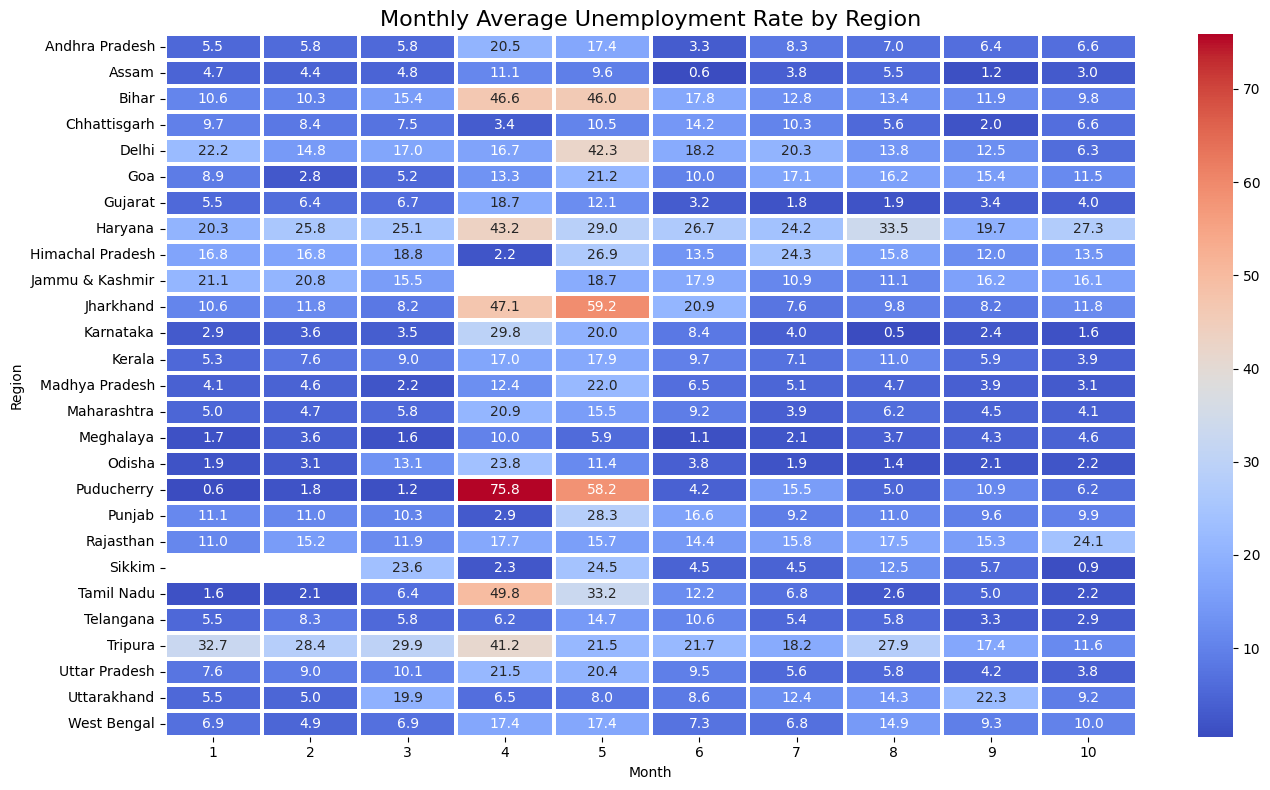

In [ ]:
employment['Month'] = employment[' Date'].dt.month
monthly_avg = employment.groupby(['Region', 'Month'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

heatmap_data = monthly_avg.pivot(index='Region', columns='Month', values=' Estimated Unemployment Rate (%)')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', linewidths=1.5)
plt.title("Monthly Average Unemployment Rate by Region", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Region")
plt.tight_layout()
plt.show()



*   This code identifies the top 6 regions with the highest average unemployment rates, individual bar plots are used to show monthly unemployment trends for each of those regions,
* This helps visualize seasonal patterns and regional differences.



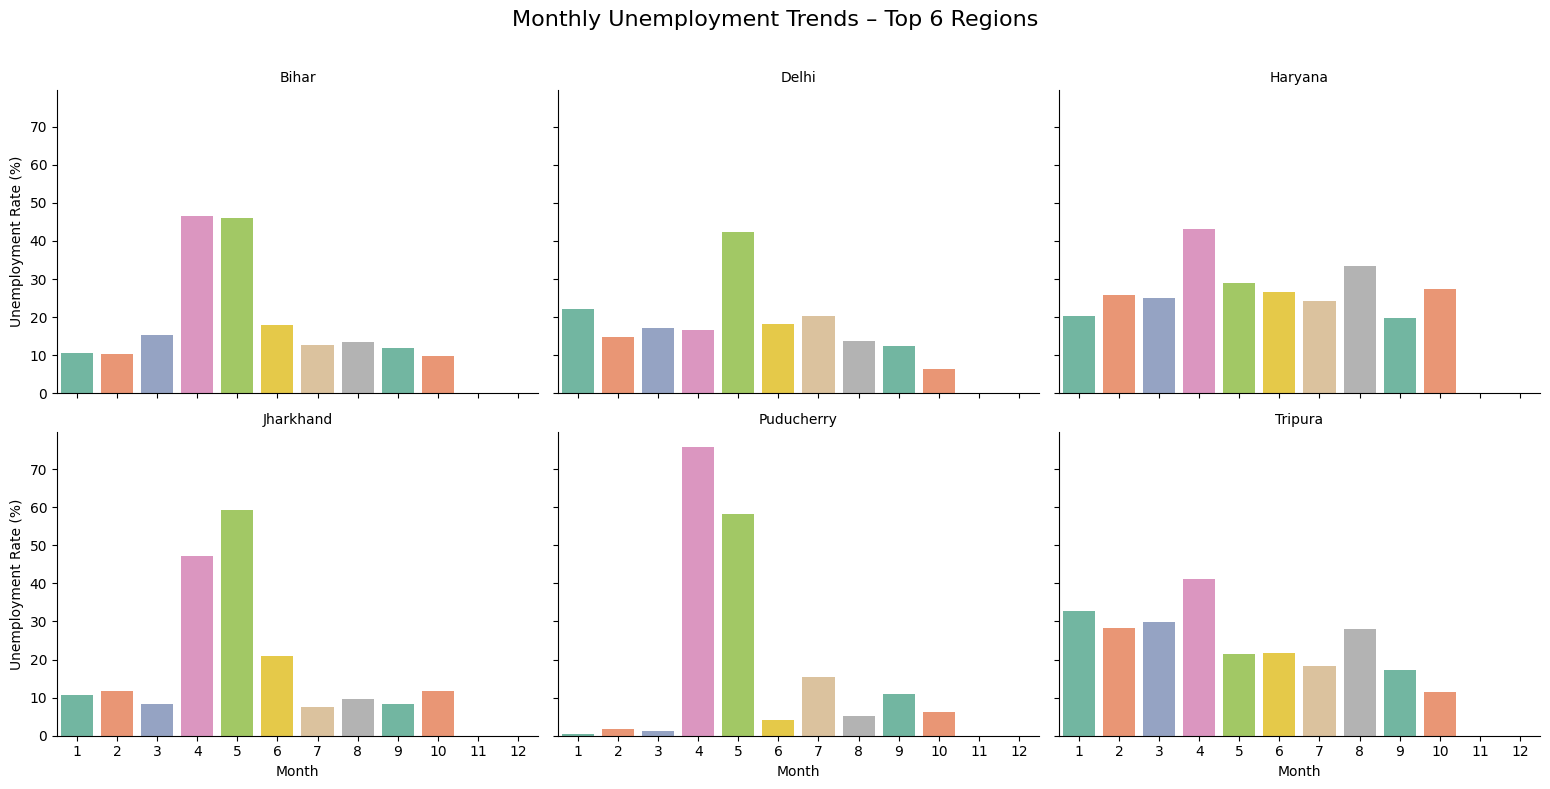

In [ ]:
employment['Month'] = employment[' Date'].dt.month
employment['Year'] = employment[' Date'].dt.year

employment.rename(columns={' Estimated Unemployment Rate (%)': ' Unemployment Rate'}, inplace=True)

top_regions = employment.groupby('Region')[' Unemployment Rate'].mean().sort_values(ascending=False).head(6).index
top_region_data = employment[employment['Region'].isin(top_regions)]

g = sns.FacetGrid(top_region_data, col='Region', col_wrap=3, height=4, aspect=1.3)
g.map_dataframe( sns.barplot, x='Month', y=' Unemployment Rate', hue='Month', palette='Set2', order=range(1, 13), legend=False)

g.set_titles("{col_name}")
g.set_axis_labels("Month", "Unemployment Rate (%)")
g.fig.suptitle("Monthly Unemployment Trends – Top 6 Regions", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()



*   This code calculates the average unemployment rate for each month across all regions and years, then plots it as a line chart to reveal seasonal trends in unemployment rates throughout the year.




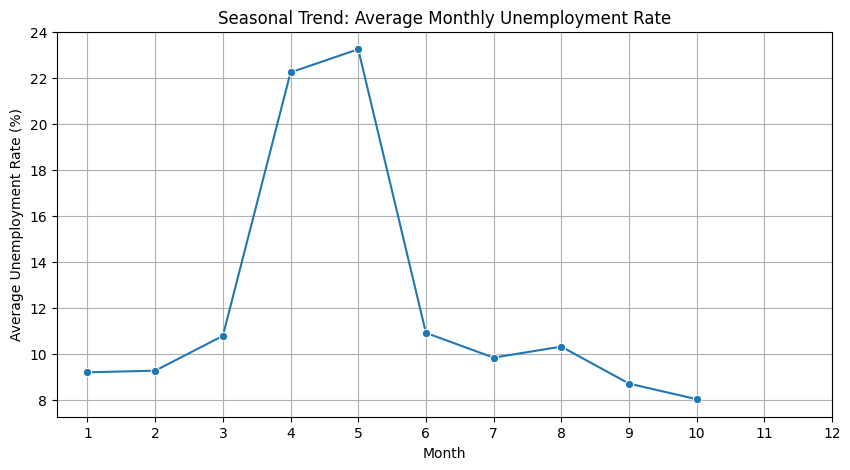

In [ ]:
employment['Month'] = pd.to_datetime(employment[' Date']).dt.month
monthly_avg = employment.groupby('Month')[' Unemployment Rate'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Seasonal Trend: Average Monthly Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

**x===========================================================================================================x**

**TASK# 3**

**CAR PRICE PREDICTION WITH MACHINE LEARNING**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
car = pd.read_csv("car data.csv")

In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
car.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


In [ ]:
print(car.duplicated().sum())

2


In [ ]:
cars = car.drop_duplicates()
print("NUMBER OF DUPLICATES AFTER DROPPING:",cars.duplicated().sum())

NUMBER OF DUPLICATES AFTER DROPPING: 0


In [ ]:
df_encoded = pd.get_dummies(cars, drop_first=True)
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()



*   Using trained model to predict values for `X_test`, then calculating and printing four performance metrics:

* **R² Score** → measures how well the predictions explain the variance in the actual data (closer to 1 is better).
* **Mean Absolute Error (MAE)** → average of absolute differences between predictions and actual values.
* **Mean Squared Error (MSE)** → average of squared differences.
* **Root Mean Squared Error (RMSE)** → square root of MSE, giving error in the same units as the target variable.




In [ ]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.3910381951772156
Mean Absolute Error (MAE): 2.463430943323325
Mean Squared Error (MSE): 14.15861156880729
Root Mean Squared Error (RMSE): 3.7627930542095043




*   This code helps determine how well the model's predictions match the actual values by generating a scatter plot that compares real prices (`y_test`) to predicted prices (`y_pred`).



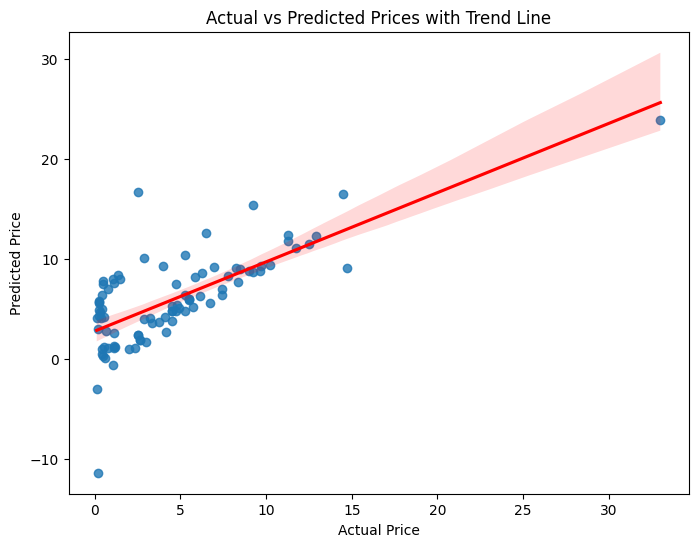

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices with Trend Line")
plt.show()



*   This code plots a side-by-side bar chart comparing actual and predicted prices for each sample.

*  By using the sample’s index on the x-axis, visual assess of how closely the predictions match the real values is taken.




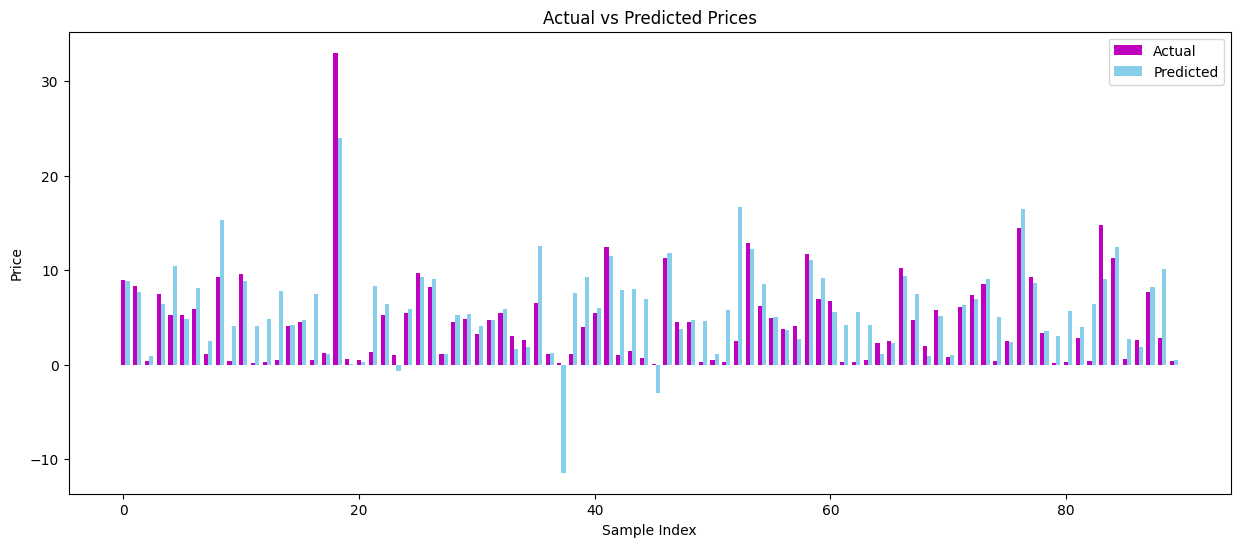

In [ ]:
indices = np.arange(len(y_test))
width = 0.35

plt.figure(figsize=(15,6))
plt.bar(indices, y_test, width=width, label='Actual', color = 'm')
plt.bar(indices + width, y_pred, width=width, label='Predicted', color = 'skyblue')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
1             Present_Price    0.905303
0                      Year    0.061364
2                Driven_kms    0.011345
91    Car_Name_land cruiser    0.008721
104     Transmission_Manual    0.003838
..                      ...         ...
61    Car_Name_Yamaha FZ 16    0.000000
58        Car_Name_TVS Wego    0.000000
73         Car_Name_corolla    0.000000
94         Car_Name_s cross    0.000000
98   Car_Name_vitara brezza    0.000000

[105 rows x 2 columns]


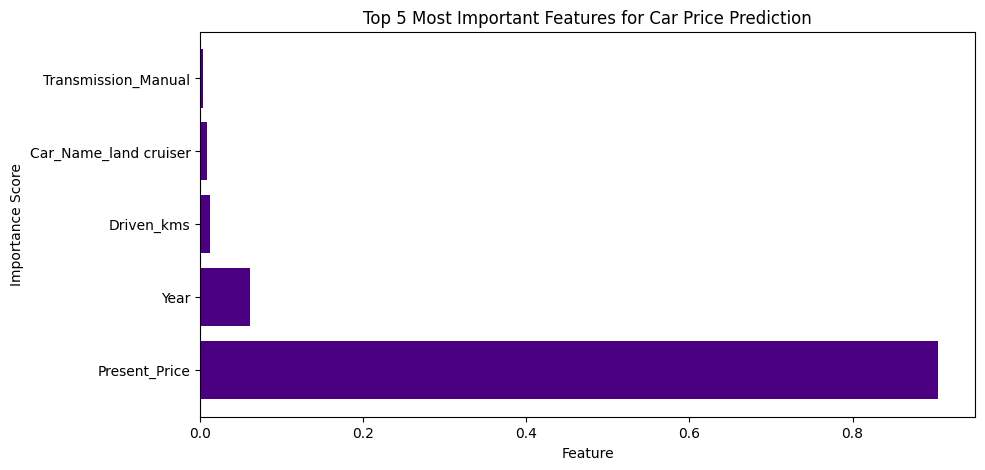

In [ ]:
top5_features = importance_df.head(5)
plt.figure(figsize=(10, 5))
plt.barh(top5_features['Feature'], top5_features['Importance'], color='indigo')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.title('Top 5 Most Important Features for Car Price Prediction')
plt.show()

**x===========================================================================================================x**